In [3]:
import pandas as pd
df=pd.read_csv('binclassv2.txt',sep=',', names = ["x1", "x2", "Label"])
df_val=df.copy()
df_val=df_val.drop('Label',axis=1)
print(df_val.shape)
#df.reset_index(drop = True, inplace = True) 
t=df.shape
print("The number of datapoints in the datset is:",t[0])
print("The number of features in the dataset is:",t[1]-1)
t1=df.columns
print("The features are:{}".format(t1))
t=df["Label"].value_counts()
print("The classes are:",t)

(400, 2)
('The number of datapoints in the datset is:', 400)
('The number of features in the dataset is:', 2)
The features are:Index([u'x1', u'x2', u'Label'], dtype='object')
('The classes are:',  1    200
-1    200
Name: Label, dtype: int64)


[-0.16535381  0.13404855]
[-30.         -28.7755102  -27.55102041 -26.32653061 -25.10204082
 -23.87755102 -22.65306122 -21.42857143 -20.20408163 -18.97959184
 -17.75510204 -16.53061224 -15.30612245 -14.08163265 -12.85714286
 -11.63265306 -10.40816327  -9.18367347  -7.95918367  -6.73469388
  -5.51020408  -4.28571429  -3.06122449  -1.83673469  -0.6122449
   0.6122449    1.83673469   3.06122449   4.28571429   5.51020408
   6.73469388   7.95918367   9.18367347  10.40816327  11.63265306
  12.85714286  14.08163265  15.30612245  16.53061224  17.75510204
  18.97959184  20.20408163  21.42857143  22.65306122  23.87755102
  25.10204082  26.32653061  27.55102041  28.7755102   30.        ]


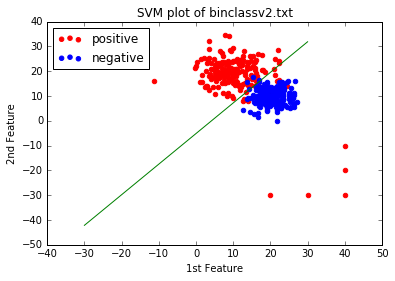

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
clf = svm.SVC(kernel='linear', C=1)
X=df[['x1','x2']]
#print(X)
y=df['Label']
df_1 = df.query('Label==1')
#print(df_1)
df_2=df.query('Label==-1')
df_1=df_1.drop('Label',axis=1)
df_2=df_2.drop('Label',axis=1)
clf.fit(X,y)
w = clf.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(-30, 30)
print(xx)
yy = a * xx - (clf.intercept_[0]) / w[1]
#print(yy)
lineStart1 = xx.min() 
lineEnd1 = xx.max() 
lineStart = yy.min() 
lineEnd = yy.max()  
plt.clf()
plt.xlabel('1st Feature')
plt.ylabel('2nd Feature')
plt.scatter(df_1['x1'].values,df_1['x2'].values,color='r',label='positive')
plt.scatter(df_2['x1'].values,df_2['x2'].values,color='b',label='negative')
plt.plot([lineStart1, lineEnd1], [lineStart, lineEnd], 'k-', color = 'g')
plt.legend(loc='best')
plt.title('SVM plot of binclassv2.txt')
#plt.xlim(lineStart, lineEnd)
#plt.ylim(lineStart, lineEnd)
plt.show()
#sns.FacetGrid(df,hue="Label",size=6).map(plt.scatter,'x1','x2').add_legend()

